# Euro Daily Exchange Rates

The main purpose of this project is to practice explanatory data visualization. We used a dataset US dollar and Euro exchange rates from 1999-2021. The data is from the European Central Bank, compiled by Daria Chemkaeva on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). 

## Reading in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print("First 5 Rows")
print(exchange_rates.head())
print("Last 5 Rows")
print(exchange_rates.tail())

First 5 Rows
  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] 

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Data cleaning

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
euro_to_dollar = exchange_rates[['Time','US_dollar']]

In [6]:
print(euro_to_dollar['US_dollar'].value_counts())
#remove null rows
euro_to_dollar = euro_to_dollar.loc[euro_to_dollar['US_dollar']!='-']

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
1.2078     1
1.0762     1
1.3415     1
1.3654     1
1.0201     1
Name: US_dollar, Length: 3528, dtype: int64


In [7]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float')

In [8]:
euro_to_dollar['US_dollar']

0       1.1789
1       1.1790
2       1.1743
3       1.1632
4       1.1659
         ...  
5694    1.2296
5695    1.2271
5696    1.2338
5697    1.2276
5698    1.2250
Name: US_dollar, Length: 5637, dtype: float64

## Moving average

In [9]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar['rolling_mean']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5694    1.211170
5695    1.212530
5696    1.213987
5697    1.215357
5698    1.216557
Name: rolling_mean, Length: 5637, dtype: float64

## Exchange Rate During the Recession

I will examine the euro-dollar exchange rate during the recession in 2007-2008. The data from 2006-2009 will be shown for context. 

In [10]:
#select data 2006-2009
recession_exchange01 = euro_to_dollar.loc[euro_to_dollar['Time'] > datetime.datetime(2005, 12, 31)]
recession_exchange = recession_exchange01.loc[recession_exchange01['Time'] < datetime.datetime(2010, 1, 1)]

In [11]:
#select data to highlight: 2007-2008
recession_highlight01 = euro_to_dollar.loc[euro_to_dollar['Time'] > datetime.datetime(2006, 12, 31)]
recession_highlight = recession_highlight01.loc[recession_highlight01['Time'] < datetime.datetime(2009, 1, 1)]

In [12]:
#select dates to highlight: exchange rate over 1.5
mask = recession_exchange[recession_exchange['rolling_mean']
                        >=1.5].index
exchangeover1_5 = recession_exchange.loc[mask]
print(exchangeover1_5)

exchangeover1_5['Time'].iloc[0]
exchangeover1_5['Time'].iloc[-1]

           Time  US_dollar  rolling_mean
2401 2008-03-18     1.5771      1.501753
2402 2008-03-19     1.5692      1.505323
2403 2008-03-20     1.5423      1.508170
2406 2008-03-25     1.5569      1.511690
2407 2008-03-26     1.5710      1.515583
...         ...        ...           ...
2519 2008-08-29     1.4735      1.520210
2520 2008-09-01     1.4621      1.516087
2521 2008-09-02     1.4516      1.511410
2522 2008-09-03     1.4441      1.507077
2523 2008-09-04     1.4488      1.503113

[120 rows x 3 columns]


Timestamp('2008-09-04 00:00:00')

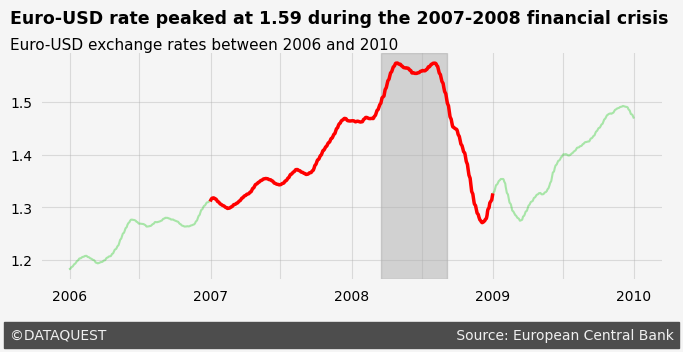

In [13]:
#plt.figure(figsize=(7,3)) #No - need ax features
#set up the plot
fig, ax = plt.subplots(figsize=(8,3), 
                       facecolor='whitesmoke')

x = recession_exchange['Time']
y = recession_exchange['rolling_mean']


plt.plot(x, y, 
         color='limegreen',
         linewidth=1.5,
         alpha=0.4)   

#background color
ax.set_facecolor('whitesmoke')
#add grid
ax.grid(visible=True, alpha=0.4)
#remove spines
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
#remove tick marks
    plt.tick_params(left=False, bottom=False)
    
#rewrite x-ticks
labellist = ['2006', '', '2007', '', '2008', '', '2009', '', '2010']
ax.set_xticklabels(labellist)

#bold red line over values 2007-2008
x = recession_highlight['Time']
y = recession_highlight['rolling_mean']
ax.plot(x, y, color='red', linewidth=2.5)

#fill between xvalues over 1.5
ax.axvspan(exchangeover1_5['Time'].iloc[0], 
           exchangeover1_5['Time'].iloc[-1], 
           alpha=0.3, ymin=0, color='grey')

#title
ax.text(datetime.datetime(2005, 7, 31), 1.65, 
        "Euro-USD rate peaked at 1.59 during the 2007-2008 financial crisis", 
        weight='bold',
        size=12.5)
ax.text(datetime.datetime(2005, 7, 31), 1.6, 
        "Euro-USD exchange rates between 2006 and 2010",
        size=11)

#source
ax.text(datetime.datetime(2005, 7, 31), 1.05, 
        '©DATAQUEST' + ' '*80 + 'Source: European Central Bank',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        size=10)

plt.show()

## Exchange rates under the last three US presidents

Now I will compare exhange rates uder the last three presidents in order to practice making subplots. 

In [14]:
#select data 2001-2020
presidents_exchange01 = euro_to_dollar.loc[euro_to_dollar['Time'] > datetime.datetime(2001, 1, 19)]
presidents_exchange = presidents_exchange01.loc[presidents_exchange01['Time'] < datetime.datetime(2021, 1, 20)]

#select data 2001-2009
bush_exchange = presidents_exchange.loc[presidents_exchange['Time'] < datetime.datetime(2009, 1, 20)]

#select data 2001-2009
obama_exchange01 = presidents_exchange.loc[presidents_exchange['Time'] > datetime.datetime(2009, 1, 19)]
obama_exchange = obama_exchange01.loc[obama_exchange01['Time'] < datetime.datetime(2017, 1, 20)]

#select data 2001-2009
trump_exchange = presidents_exchange.loc[presidents_exchange['Time'] > datetime.datetime(2017, 1, 19)]

The basic/default plot:

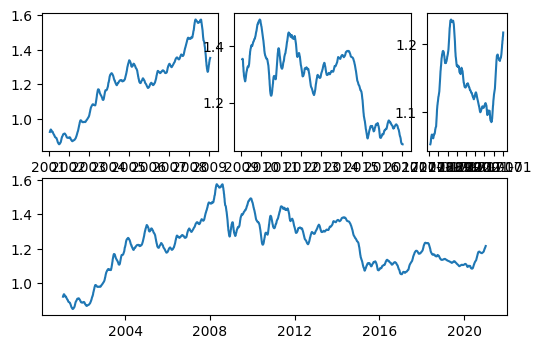

In [17]:
plot1 = plt.subplot2grid((2, 5), (0, 0), colspan=2)
plot2 = plt.subplot2grid((2, 5), (0, 2), colspan=2)
plot3 = plt.subplot2grid((2, 5), (0, 4), colspan=5)
plot4 = plt.subplot2grid((2, 5), (1,0), colspan=5)

plot1.plot(bush_exchange['Time'],
          bush_exchange['rolling_mean'])
plot2.plot(obama_exchange['Time'], 
           obama_exchange['rolling_mean'])
plot3.plot(trump_exchange['Time'],
          trump_exchange['rolling_mean'])
plot4.plot(presidents_exchange['Time'], 
           presidents_exchange['rolling_mean'])

plt.show()

And then the final version:

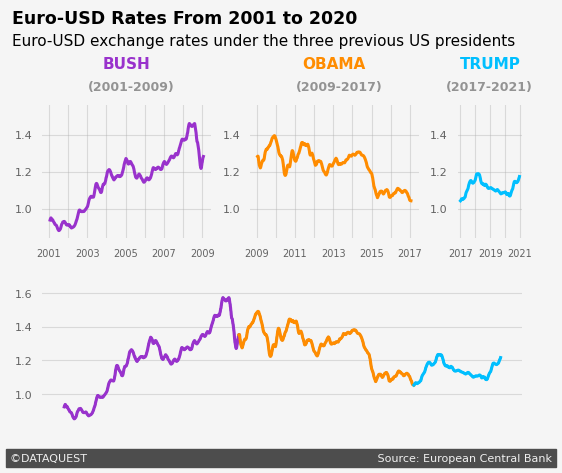

In [15]:
fig = plt.figure(facecolor='whitesmoke')
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 5), (0, 2), colspan=2)
ax3 = plt.subplot2grid((2, 5), (0, 4), colspan=5)
ax4 = plt.subplot2grid((2, 5), (1,0), colspan=5)

ax1.plot(bush_exchange['Time'],
          bush_exchange['rolling_mean'],
        color='darkorchid', linewidth=2.2)
ax2.plot(obama_exchange['Time'], 
           obama_exchange['rolling_mean'],
        color='darkorange', linewidth=2.2)
ax3.plot(trump_exchange['Time'],
          trump_exchange['rolling_mean'],
        color='deepskyblue', linewidth=2.2)
ax4.plot(presidents_exchange['Time'], 
           presidents_exchange['rolling_mean'])

#color the presidencies in plot 4
ax4.plot(bush_exchange['Time'],
          bush_exchange['rolling_mean'],
        color='darkorchid', linewidth=2.2)
ax4.plot(obama_exchange['Time'], 
           obama_exchange['rolling_mean'],
        color='darkorange', linewidth=2.2)
ax4.plot(trump_exchange['Time'],
          trump_exchange['rolling_mean'],
        color='deepskyblue', linewidth=2.2)

ax_all = [ax1, ax2, ax3, ax4]
ax_all3 = [ax1, ax2, ax3]
#set y-axis min and max
for ax in (ax_all3):
    ax.set_ylim(bottom=0.8, top=1.7)
    
#style
for ax in (ax_all):
    #background color
    ax.set_facecolor('whitesmoke')
    #add grid
    ax.grid(visible=True, alpha=0.4)
    #remove spines
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_visible(False)
    #remove tick marks
    ax.tick_params(left=False, bottom=False)
    
#grid plot 3
myxticks = [datetime.datetime(2017, 1, 20), datetime.datetime(2018, 1, 20),
            datetime.datetime(2019, 1, 20), datetime.datetime(2020, 1, 20),
           datetime.datetime(2021, 1, 20)]
ax3.set_xticks(myxticks)

#grid plot 4
myxticks4 = []
ax4.set_xticks(myxticks4)

#rewrite x-ticks
labellist1 = ['', '2001', '', '2003', '', '2005', '', '2007', '', '2009']
ax1.set_xticklabels(labellist1, fontsize=7, alpha=0.6)
labellist2 = ['', '2009', '', '2011', '', '2013', '', '2015', '', '2017']
ax2.set_xticklabels(labellist2, fontsize=7, alpha=0.6)
labellist3 = ['2017', '', '2019', '', '2021']
ax3.set_xticklabels(labellist3, fontsize=7, alpha=0.6)

#rewrite y-ticks
ylabellist = [x / 10.0 for x in range(8, 17, 2)]
for ax in (ax_all):
    ax.set_yticklabels(ylabellist, fontsize=8, alpha=0.6)

#subtitles
ax1.set_title("BUSH", fontsize=11, 
              weight='bold', color='darkorchid', pad=26)
ax2.set_title('OBAMA', fontsize=11, 
              weight='bold', color='darkorange', pad=26)
ax3.set_title('TRUMP', fontsize=11, 
              weight='bold', color='deepskyblue', pad=26)

#subtitle dates
ax1.text(datetime.datetime(2003, 1, 21), 1.8, 
         "(2001-2009)",
        size=9, weight='bold', alpha=0.4)
ax2.text(datetime.datetime(2011, 1, 21), 1.8, 
         "(2009-2017)",
        size=9, weight='bold', alpha=0.4)
ax3.text(datetime.datetime(2016, 1, 21), 1.8, 
         "(2017-2021)",
        size=9, weight='bold', alpha=0.4)

#spacing between plots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.4)

#source
ax4.text(datetime.datetime(1998, 7, 31), 0.6, 
        '©DATAQUEST' + ' '*83 + 'Source: European Central Bank',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        size=8)

#title
ax1.text(datetime.datetime(1999, 1, 31), 2.25, 
        "Euro-USD Rates From 2001 to 2020", 
        weight='bold',
        size=12.5)
ax1.text(datetime.datetime(1999, 1, 31), 2.1, 
        "Euro-USD exchange rates under the three previous US presidents",
        size=11)


plt.show()
#fig.tight_layout()